<a href="https://colab.research.google.com/github/kogodemilade/Kaggle-Space-Titanic/blob/main/space_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports, Data inspection and cleaning**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.ensemble import RandomForestClassifier as RFC

In [ ]:
df = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
df.head(5)
print(df[df['PassengerId']=='4863_01'])

     PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
4565     4863_01     Europa       NaN  T/2/S  TRAPPIST-1e  37.0  False   

      RoomService  FoodCourt  ShoppingMall   Spa  VRDeck             Name  \
4565       1721.0      667.0           NaN  28.0  1362.0  Phacton Unsible   

      Transported  
4565        False  


In [ ]:
df.tail(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [ ]:
print("Percentage of people who entered Cryosleep", (df[df['CryoSleep']==True].count()['PassengerId'])/df.shape[0], "%")
print("Percentage of people who were VIPs", df[df['VIP']==True].count()['PassengerId']/df.shape[0], "%")
print("Number of distinct Home Planets", df['HomePlanet'].nunique())
print("Number of distinct Destination Planets", df['Destination'].nunique())

Percentage of people who entered Cryosleep 0.3493615552743587 %
Percentage of people who were VIPs 0.02289198205452663 %
Number of distinct Home Planets 3
Number of distinct Destination Planets 3


In [ ]:
print(df['HomePlanet'].value_counts())
print(df['Destination'].value_counts())

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64
Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64


In [ ]:
df_hp = pd.get_dummies(df['HomePlanet'], drop_first=True, dtype=int)
df_destination = pd.get_dummies(df['Destination'], drop_first=True, dtype=int)
df_cs = pd.get_dummies(df['CryoSleep'], prefix='CryoSleep', drop_first=True, dtype=int)
df_vip = pd.get_dummies(df['VIP'], prefix='VIP', drop_first=True, dtype=int)

In [ ]:
cryosleep_median = df['CryoSleep'].median()
vip_median = df['VIP'].median()
df.fillna({'CryoSleep': cryosleep_median, 'VIP': vip_median}, inplace=True)

In [ ]:
df.fillna({'HomePlanet': df['HomePlanet'].mode()[0],
           'Destination': df['Destination'].mode()[0],
           'CryoSleep': df['CryoSleep'].mode()[0],
           'VIP': df['VIP'].mode()[0]}, inplace=True)

In [ ]:
transformed_df = pd.concat([df, df_hp, df_destination, df_cs, df_vip], axis=1)
print(transformed_df.shape)

(8693, 20)


In [ ]:
null_col_counts = transformed_df[transformed_df.isnull()==False].count()
# print(null_col_counts)
## cabin, age, roomservice,foodcourt, shoppingmall, spa, vrdeck

In [ ]:
means = transformed_df.select_dtypes(['int64', 'float64']).mode(axis=0)
transformed_df['Luxuries'] = transformed_df['FoodCourt'] + transformed_df['ShoppingMall'] + transformed_df['Spa'] + transformed_df['RoomService'] + transformed_df['VRDeck']
transformed_df['Luxuries'] = (transformed_df['Luxuries'] / transformed_df['Luxuries'].max()) *100
print(transformed_df['Luxuries'])

0        0.000000
1        2.045183
2       28.852085
3       14.382972
4        3.031650
          ...    
8688    23.719677
8689     0.000000
8690     5.204657
8691    12.885209
8692    13.410398
Name: Luxuries, Length: 8693, dtype: float64


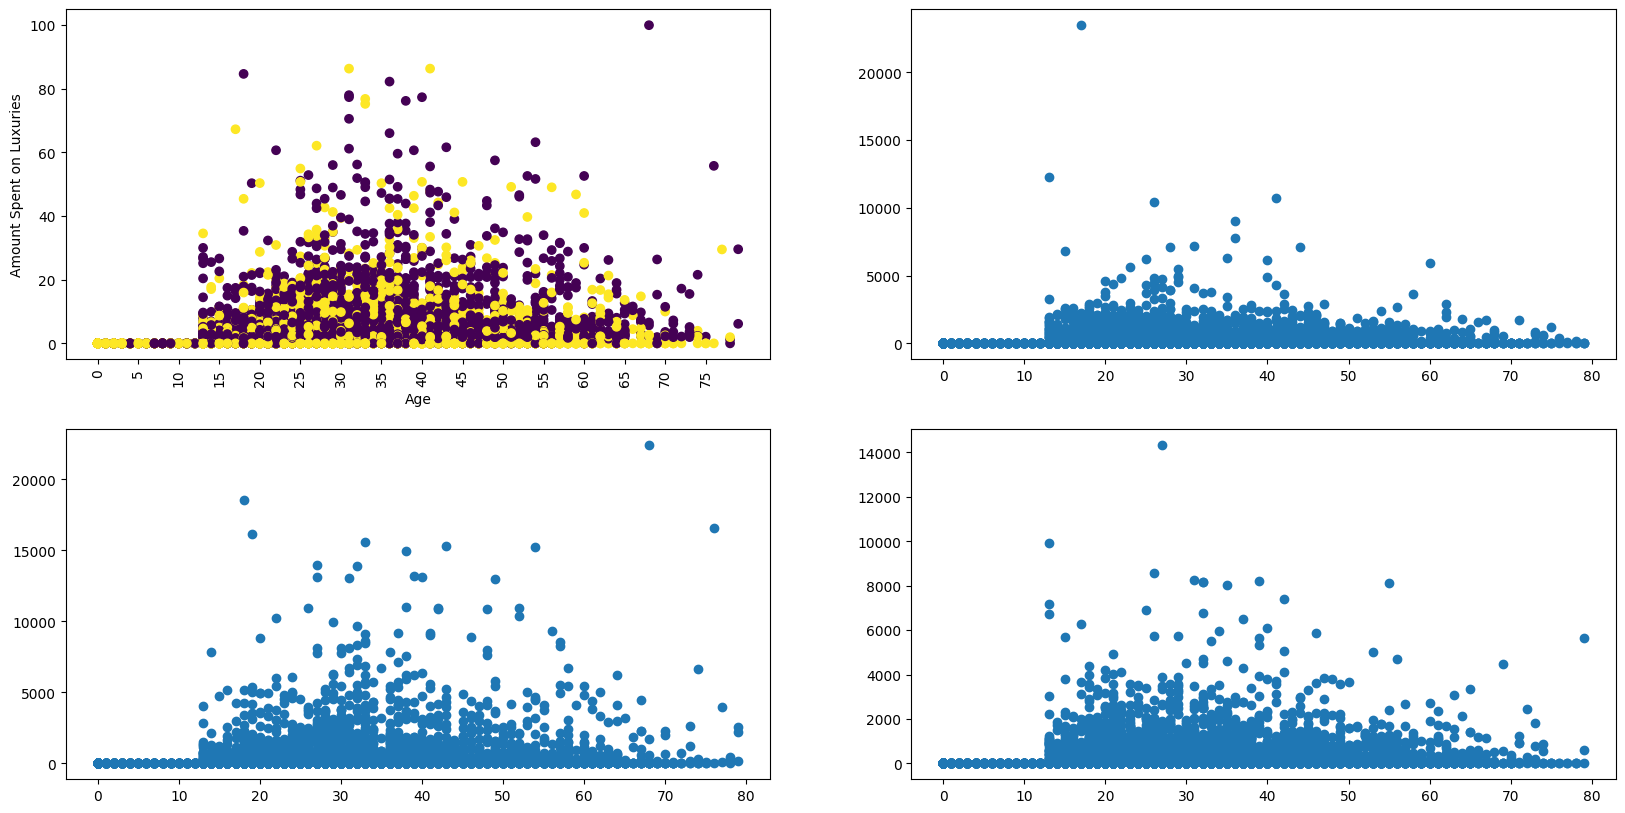

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
ax[0][0].tick_params(axis='x', rotation=90)
ax[0][0].scatter(transformed_df['Age'], transformed_df['Luxuries'], c=transformed_df['Transported'])
ax[0][0].set_ylabel('Amount Spent on Luxuries')
ax[0][0].set_xlabel('Age')
ax[0][0].set_xticks(range(0, 80, 5))
ax[0][1].scatter(transformed_df['Age'], transformed_df['ShoppingMall'])
ax[1][0].scatter(transformed_df['Age'], transformed_df['Spa'])
ax[1][1].scatter(transformed_df['Age'], transformed_df['RoomService'])
# plt.setp(ax, xlim=(0, 80), ylim=(0, 5000))
plt.show()

Seems like there isn't really a correlation between age and amount of money spent, although we see that people under the age of 12 or so spent 0 on all, we can assume people under 12 weren't even allowed to use them.

In [ ]:
transformed_df.fillna({'Age': round(df['Age'].mean())}, inplace=True)

In [ ]:
unskewed_df = transformed_df[transformed_df['Age'] > 12] #All children below 12 would have 0, skewing the true mean
luxury_means = {'ShoppingMall': unskewed_df['ShoppingMall'].mean(),
                'Spa': unskewed_df['Spa'].mean(),
                'RoomService': unskewed_df['RoomService'].mean(),
                'VRDeck': unskewed_df['VRDeck'].mean(),
                'FoodCourt': unskewed_df['FoodCourt'].mean()}

# fill people older than 12 with the respective means
for column_, mean_spent in luxury_means.items():
  mask = (transformed_df[column_].isnull()) & (transformed_df['Age'] <= 12)
  transformed_df.loc[mask, column_] = mean_spent


# Fill the remaining ages (people less than or equal to 12 years of age) with 0.
transformed_df.fillna({'ShoppingMall': 0, 'Spa': 0, 'RoomService': 0, 'VRDeck': 0, 'FoodCourt': 0}, inplace=True)


# **Feature Engineering**

In [ ]:
cleaned_df = transformed_df.drop(['Name', 'CryoSleep', 'VIP', 'HomePlanet', 'Destination', 'HomePlanet'], axis=1)
target = transformed_df['Transported']

In [ ]:
groups = [i.split('_')[0] for i in cleaned_df['PassengerId']]
groups_freq_ = {i:groups.count(i) for i in groups}
group = [item for item, freq in groups_freq_.items() if freq > 1]
cleaned_df['Group'] = pd.Series(groups)    ###Commented out because I don't want it re-run

In [ ]:
g_series = cleaned_df.groupby('Group').count()['PassengerId'] > 1
g_series = g_series[g_series == True]
mask = cleaned_df['Group'].isin(g_series.index)
cleaned_df['InGroup'] = mask.astype("int64")
# print(cleaned_df.tail(10))

In [ ]:
# cleaned_df.drop(['PassengerId','Group'], axis=1, inplace=True)
cleaned_df['Luxuries'] = (cleaned_df['FoodCourt'] + cleaned_df['ShoppingMall'] + cleaned_df['Spa'] + cleaned_df['RoomService'] + cleaned_df['VRDeck'])/5
# cleaned_df['Luxuries'] = (cleaned_df['Luxuries'] / cleaned_df['Luxuries'].max()) *100


In [ ]:
target = cleaned_df['Transported']
# cleaned_df.drop('Transported', inplace=True, axis=1)

In [ ]:
alt1 = cleaned_df.drop(['Cabin', 'Transported'], axis=1)
cleaned_wo = cleaned_df.copy()
cleaned_wo.drop(['Cabin', 'Transported'], axis=1, inplace=True)
cleaned_df.dropna(inplace=True) #only one's with nans is cabin

c_target = cleaned_df['Transported']
cleaned_df.drop('Transported', inplace=True, axis=1)

cab_sep_list = cleaned_df.apply(lambda row: row['Cabin'].split('/'), axis=1)
side = [i[2] for i in cab_sep_list]
deck = [i[0] for i in cab_sep_list]
cleaned_df['Side'] = side
cleaned_df['Deck'] = deck
# print(cleaned_df.groupby(['Side']).count()) = 2

In [ ]:
df_side = pd.get_dummies(cleaned_df['Side'], prefix='Side', drop_first=True, dtype='int64')
df_deck = pd.get_dummies(cleaned_df['Deck'], prefix='Deck', drop_first=True, dtype='int64')
cleaned_df = pd.concat([cleaned_df, df_side, df_deck], axis=1)

In [ ]:
num = [int(i[1]) for i in cab_sep_list]
cleaned_df['CabinNum'] = num
cleaned_df['CabinBand'] = pd.qcut(cleaned_df['CabinNum'], q=20, labels=[i for i in range(20)])

cleaned_df.drop(['Cabin', 'CabinNum', 'Deck', 'Side'], axis=1, inplace=True)
cleaned_df.set_index('PassengerId', inplace=True)
alt1.set_index('PassengerId', inplace=True)
cleaned_wo.set_index('PassengerId', inplace=True)
print(cleaned_df.columns)

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Europa', 'Mars', 'PSO J318.5-22', 'TRAPPIST-1e', 'CryoSleep_True',
       'VIP_True', 'Luxuries', 'Group', 'InGroup', 'Side_S', 'Deck_B',
       'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T',
       'CabinBand'],
      dtype='object')


In [ ]:
alt_df = cleaned_df.drop(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Group'], axis=1)
cleaned_df = cleaned_df.drop(['Group', 'Luxuries'], axis=1)
cleaned_wo = cleaned_wo.drop(['Group', 'Luxuries'], axis=1)
alt1 = alt1.drop(['Luxuries'], axis=1)

In [ ]:
mew = alt_df[['Age', 'Luxuries']].mean(axis=0)
std_ = alt_df[['Age', 'Luxuries']].std(axis=0)
alt_df[['Age', 'Luxuries']] = (alt_df[['Age', 'Luxuries']]- mew)/std_

c_mew = cleaned_df[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].mean(axis=0)
c_std_ = cleaned_df[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].std(axis=0)
cleaned_df[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = (cleaned_df[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]- c_mew)/c_std_

c_wo_mew = cleaned_wo[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].mean(axis=0)
c_wo_std_ = cleaned_wo[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].std(axis=0)
cleaned_wo[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = (cleaned_wo[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]- c_wo_mew)/c_wo_std_

alt1_mew = alt1[['Age']].mean(axis=0)
alt1_std_ = alt1[['Age']].std(axis=0)
alt1[['Age']] = (alt1[['Age']]- alt1_mew)/alt1_std_

# **Training and Hyper-parameter Tuning**

In [ ]:
np_features_w = cleaned_df.to_numpy()
np_labels_w = c_target.to_numpy(dtype='int64')

np_features_wo = cleaned_wo.to_numpy()
np_labels_wo = target.to_numpy(dtype='int64')

In [ ]:
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(np_features_w, np_labels_w, test_size=0.33, random_state=42)

X_train_wo, X_test_wo, y_train_wo, y_test_wo = train_test_split(np_features_wo, np_labels_wo, test_size=0.33, random_state=42)

clf= sklearn.svm.SVC(kernel='rbf', C=1000)
clf.fit(X_train_w, y_train_w)
print(clf.score(X_test_w, y_test_w)*100)

81.09843081312411


In [ ]:
main_clf = GBC(n_estimators=148)
main_clf.fit(np_features_w, np_labels_w)
# print(main_clf.score(X_test_w, y_test_w)*100)

GradientBoostingClassifier(n_estimators=148)

In [ ]:
main_clf_wo = GBC(n_estimators=160, max_depth=5)
main_clf_wo.fit(np_features_wo, np_labels_wo)
# print(main_clf_wo.score(X_test_wo, y_test_wo)*100)

GradientBoostingClassifier(max_depth=5, n_estimators=160)

In [ ]:
# 81.06276747503567
# 81.41940085592012

In [ ]:
clf3 = RFC(n_estimators=150)
clf3.fit(X_train_w, y_train_w)
print(clf3.score(X_test_w, y_test_w)*100)

81.99001426533523


# Results

In [ ]:
df = pd.read_csv('test.csv')

df_hp = pd.get_dummies(df['HomePlanet'], drop_first=True, dtype=int)
df_destination = pd.get_dummies(df['Destination'], drop_first=True, dtype=int)
df_cs = pd.get_dummies(df['CryoSleep'], prefix='CryoSleep', drop_first=True, dtype=int)
df_vip = pd.get_dummies(df['VIP'], prefix='VIP', drop_first=True, dtype=int)

cryosleep_median = df['CryoSleep'].median()
vip_median = df['VIP'].median()
df.fillna({'CryoSleep': cryosleep_median, 'VIP': vip_median}, inplace=True)
df.fillna({'HomePlanet': df['HomePlanet'].mode()[0],
           'Destination': df['Destination'].mode()[0],
           'CryoSleep': df['CryoSleep'].mode()[0],
           'VIP': df['VIP'].mode()[0]}, inplace=True)

transformed_df = pd.concat([df, df_hp, df_destination, df_cs, df_vip], axis=1)
print(transformed_df.shape)

(4277, 19)


In [ ]:
means = transformed_df.select_dtypes(['int64', 'float64']).mode(axis=0)

transformed_df.fillna({'Age': round(df['Age'].mean())}, inplace=True)

unskewed_df = transformed_df[transformed_df['Age'] > 12] #All children below 12 would have 0, skewing the true mean
luxury_means = {'ShoppingMall': unskewed_df['ShoppingMall'].mean(),
                'Spa': unskewed_df['Spa'].mean(),
                'RoomService': unskewed_df['RoomService'].mean(),
                'VRDeck': unskewed_df['VRDeck'].mean(),
                'FoodCourt': unskewed_df['FoodCourt'].mean()}

# fill people older than 12 with the respective means
for column_, mean_spent in luxury_means.items():
  mask = (transformed_df[column_].isnull()) & (transformed_df['Age'] <= 12)
  transformed_df.loc[mask, column_] = mean_spent


# Fill the remaining ages (people less than or equal to 12 years of age) with 0.
transformed_df.fillna({'ShoppingMall': 0, 'Spa': 0, 'RoomService': 0, 'VRDeck': 0, 'FoodCourt': 0}, inplace=True)


In [ ]:
cleaned_df = transformed_df.drop(['Name', 'CryoSleep', 'VIP', 'HomePlanet', 'Destination', 'HomePlanet'], axis=1)
groups = [i.split('_')[0] for i in cleaned_df['PassengerId']]
groups_freq_ = {i:groups.count(i) for i in groups}
group = [item for item, freq in groups_freq_.items() if freq > 1]
cleaned_df['Group'] = pd.Series(groups)    ###Commented out because I don't want it re-run

g_series = cleaned_df.groupby('Group').count()['PassengerId'] > 1
g_series = g_series[g_series == True]
mask = cleaned_df['Group'].isin(g_series.index)
cleaned_df['InGroup'] = mask.astype("int64")
print(cleaned_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     4277 non-null   object 
 1   Cabin           4177 non-null   object 
 2   Age             4277 non-null   float64
 3   RoomService     4277 non-null   float64
 4   FoodCourt       4277 non-null   float64
 5   ShoppingMall    4277 non-null   float64
 6   Spa             4277 non-null   float64
 7   VRDeck          4277 non-null   float64
 8   Europa          4277 non-null   int64  
 9   Mars            4277 non-null   int64  
 10  PSO J318.5-22   4277 non-null   int64  
 11  TRAPPIST-1e     4277 non-null   int64  
 12  CryoSleep_True  4277 non-null   int64  
 13  VIP_True        4277 non-null   int64  
 14  Group           4277 non-null   object 
 15  InGroup         4277 non-null   int64  
dtypes: float64(6), int64(7), object(3)
memory usage: 534.8+ KB
None


In [ ]:
cleaned_wo = cleaned_df[cleaned_df['Cabin'].isna()]
cleaned_wo.drop('Cabin', axis=1, inplace=True)
cleaned_df.dropna(inplace=True) #only one's with nans is cabin

cab_sep_list = cleaned_df.apply(lambda row: row['Cabin'].split('/'), axis=1)
side = [i[2] for i in cab_sep_list]
deck = [i[0] for i in cab_sep_list]
cleaned_df['Side'] = side
cleaned_df['Deck'] = deck

df_side = pd.get_dummies(cleaned_df['Side'], prefix='Side', drop_first=True, dtype='int64')
df_deck = pd.get_dummies(cleaned_df['Deck'], prefix='Deck', drop_first=True, dtype='int64')
cleaned_df = pd.concat([cleaned_df, df_side, df_deck], axis=1)

num = [int(i[1]) for i in cab_sep_list]
cleaned_df['CabinNum'] = num
cleaned_df['CabinBand'] = pd.qcut(cleaned_df['CabinNum'], q=20, labels=[i for i in range(20)])

cleaned_df.drop(['Cabin', 'CabinNum', 'Deck', 'Side'], axis=1, inplace=True)
cleaned_df.set_index('PassengerId', inplace=True)
cleaned_wo.set_index('PassengerId', inplace=True)

cleaned_df = cleaned_df.drop(['Group'], axis=1)
cleaned_wo = cleaned_wo.drop(['Group'], axis=1)


c_mew = cleaned_df[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].mean(axis=0)
c_std_ = cleaned_df[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].std(axis=0)
cleaned_df[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = (cleaned_df[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]- c_mew)/c_std_

c_wo_mew = cleaned_wo[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].mean(axis=0)
c_wo_std_ = cleaned_wo[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].std(axis=0)
cleaned_wo[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = (cleaned_wo[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]- c_wo_mew)/c_wo_std_


print(cleaned_df.columns)

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Europa', 'Mars', 'PSO J318.5-22', 'TRAPPIST-1e', 'CryoSleep_True',
       'VIP_True', 'InGroup', 'Side_S', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E',
       'Deck_F', 'Deck_G', 'Deck_T', 'CabinBand'],
      dtype='object')


<ipython-input-470-28e57b19c4c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_wo.drop('Cabin', axis=1, inplace=True)


In [ ]:
np_features_w = cleaned_df.to_numpy()

np_features_wo = cleaned_wo.to_numpy()


res1_index = cleaned_df.index.to_list()
res2_index = cleaned_wo.index.to_list()
# main_clf = GBC(n_estimators=148)
# main_clf.fit(np_features_w, np_labels_w)
result1 = main_clf.predict(np_features_w)
result2 = main_clf_wo.predict(np_features_wo)
data1 = [res1_index, result1]
data2 = [res2_index, result2]

pd_ans_1 = pd.DataFrame(data=list(zip(*data1)), columns=['PassengerId', 'Transported'])
pd_ans_2 = pd.DataFrame(data=list(zip(*data2)), columns=['PassengerId', 'Transported'])

ans = pd.concat([pd_ans_1, pd_ans_2], axis=0)
print(ans)
# main_clf_wo = GBC(n_estimators=160, max_depth=5)
# main_clf_wo.fit(np_features_wo, np_labels_wo)

   PassengerId  Transported
0      0013_01            1
1      0018_01            0
2      0019_01            1
3      0021_01            1
4      0023_01            1
..         ...          ...
95     9138_01            0
96     9223_01            1
97     9223_02            1
98     9238_05            1
99     9269_01            0

[4277 rows x 2 columns]


In [ ]:
ans['Transported'] = ans['Transported'].map({1: 'True', 0: 'False'})
print(ans)

   PassengerId Transported
0      0013_01        True
1      0018_01       False
2      0019_01        True
3      0021_01        True
4      0023_01        True
..         ...         ...
95     9138_01       False
96     9223_01        True
97     9223_02        True
98     9238_05        True
99     9269_01       False

[4277 rows x 2 columns]


In [ ]:
ans.to_csv('ans_.csv', index=False)